# Ejercicios 2

### 1. Crea una caja en $2d$ de tamaño $1000$ con las siguientes distribuciones:

Nota: Todas las funciones siguientes dan por hecho que el espacio es $2d$ y que los lados de la caja van de $0$ al tamaño deseado. O sea, no hay valores negativos en los ejes y las cajas son todas cuadradas.

#### a) puntos en una malla cuadriculada de distancia ($10x10$ cada retícula)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from pylab import rcParams

rcParams['figure.figsize'] = (10, 10)

In [28]:
def unif_cuad_dist(box_size, dist):
    X = np.arange(0.0, box_size + 1.0, dist)
    Y = np.zeros(int(box_size / dist) + 1)
    malla_x = np.arange(0.0, box_size + 1.0, dist)
    
    for x in malla_x:
        y = x * np.ones(int(box_size / dist) + 1)
        X = np.concatenate((X, malla_x), axis = None)
        Y = np.concatenate((Y, y), axis = None)
    
    return X, Y

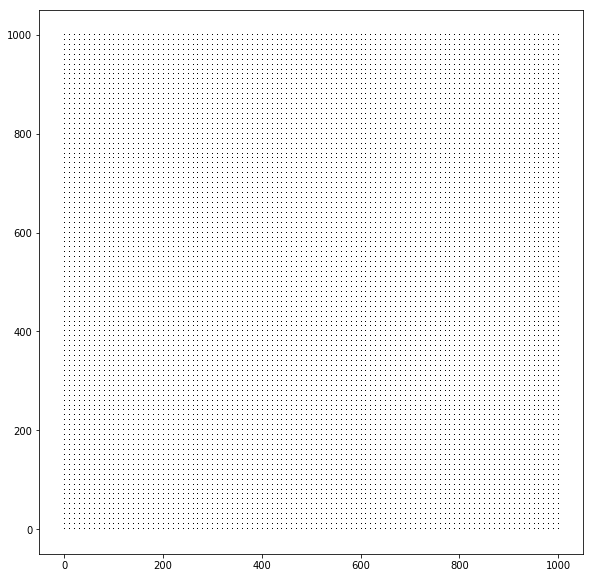

In [29]:
X, Y = unif_cuad_dist(1000.0, 10.0)
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')

#### b) 1000 puntos sobre un disco de radio 300

In [30]:
def disc_dist(box_size, n_points, radius, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = radius * random.random()
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)
    
        X.append(x)
        Y.append(y)
        
    return X, Y

Text(0.5,1,'Dist. no uniforme y centrada en el centro de la caja')

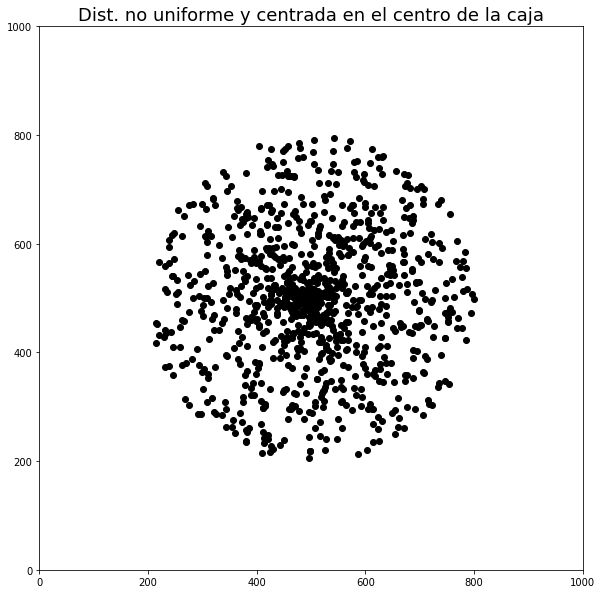

In [31]:
box_size = 1000
X, Y = disc_dist(box_size, 1000, 300.0, box_size / 2.0, box_size / 2.0)

plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. no uniforme y centrada en el centro de la caja', fontsize = 18)

In [32]:
def unif_disc_dist(box_size, n_points, radius, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = pow(random.randrange(0, radius**2, 1), 0.5)
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)

        X.append(x)
        Y.append(y)
        
    return X, Y

Text(0.5,1,'Dist. uniforme y centrada en una esquina de la caja')

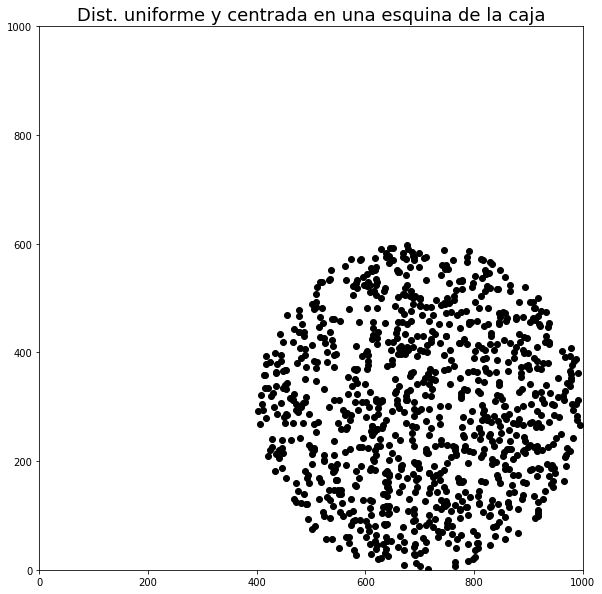

In [33]:
box_size = 1000
radius = 300.0
X, Y = unif_disc_dist(box_size, 1000, radius, box_size - radius, radius)

plt.plot(X, Y, 'ko')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title('Dist. uniforme y centrada en una esquina de la caja', fontsize = 18)

#### c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290 

In [34]:
def anillo_dist(box_size, n_points, r_int, r_ext, x_0, y_0):
    X = []
    Y = []
    
    for i in range(n_points):
        theta = 2.0 * math.pi * random.random()
        r = r_int + (r_ext - r_int) * random.random()
        x = x_0 + r * math.cos(theta)
        y = y_0 + r * math.sin(theta)
    
        X.append(x)
        Y.append(y)
    
    return X, Y

(0, 1000)

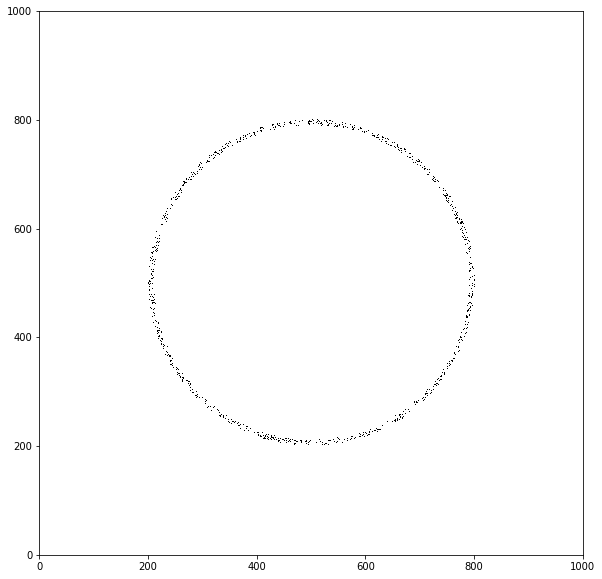

In [35]:
box_size = 1000
X, Y = anillo_dist(box_size, 1000, 290.0, 300.0, box_size / 2.0, box_size / 2.0)
        
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])

#### d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

In [36]:
def draw_ring(x_0, y_0, radius, n_points):
    X = []
    Y = []
    delta = 2.0 * math.pi / float(n_points)
    
    for i in range(n_points):
        theta = i * delta
        x = x_0 + radius * math.cos(theta)
        y = y_0 + radius * math.sin(theta)
        
        X.append(x)
        Y.append(y)
        
    return X, Y

In [37]:
# Sin condiciones periódicas. Ningún anillo se sale de la caja.
def rand_circles_dist(box_size, n_rings, n_points_p_ring):
    radius = float(box_size) * random.random() / 2.0
    x_0 = radius + (box_size - 2.0 * radius) * random.random()
    y_0 = radius + (box_size - 2.0 * radius) * random.random()
    X, Y = draw_ring(x_0, y_0, radius, n_points_p_ring)
    
    for i in range(n_rings - 1):
        radius = float(box_size) * random.random() / 2.0
        x_0 = radius + (box_size - 2.0 * radius) * random.random()
        y_0 = radius + (box_size - 2.0 * radius) * random.random()
        x_c, y_c = draw_ring(x_0, y_0, radius, n_points_p_ring)
        X = np.concatenate((X, x_c), axis = None)
        Y = np.concatenate((Y, y_c), axis = None)
        
    return X, Y

Text(0.5,1,'Radios aleatorios')

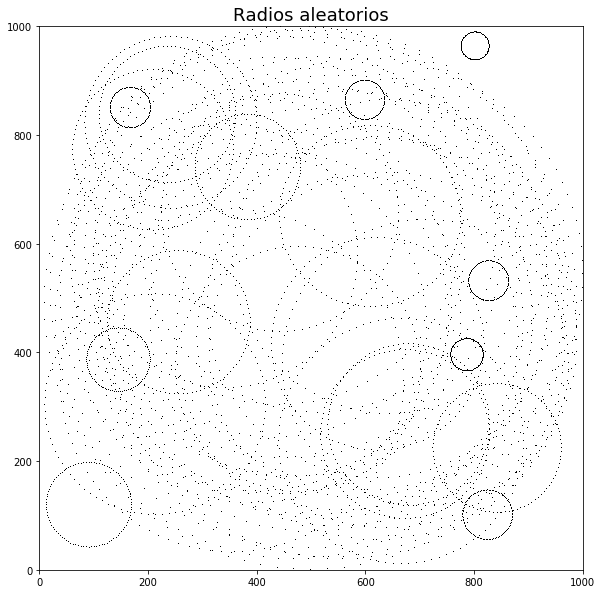

In [38]:
box_size = 1000
X, Y = rand_circles_dist(box_size, 50, 100)
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title("Radios aleatorios", fontsize = 18)

In [39]:
# Sin condiciones periódicas. Ningún anillo se sale de la caja.
def unif_circles_dist(box_size, n_rings, n_points_p_ring, r_ring):
    x_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
    y_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
    X, Y = draw_ring(x_0, y_0, r_ring, n_points_p_ring)
    
    for i in range(n_rings - 1):
        x_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
        y_0 = r_ring + (box_size - 2.0 * r_ring) * random.random()
        x_c, y_c = draw_ring(x_0, y_0, r_ring, n_points_p_ring)
        X = np.concatenate((X, x_c), axis = None)
        Y = np.concatenate((Y, y_c), axis = None)
        
    return X, Y

Text(0.5,1,'Mismo radio')

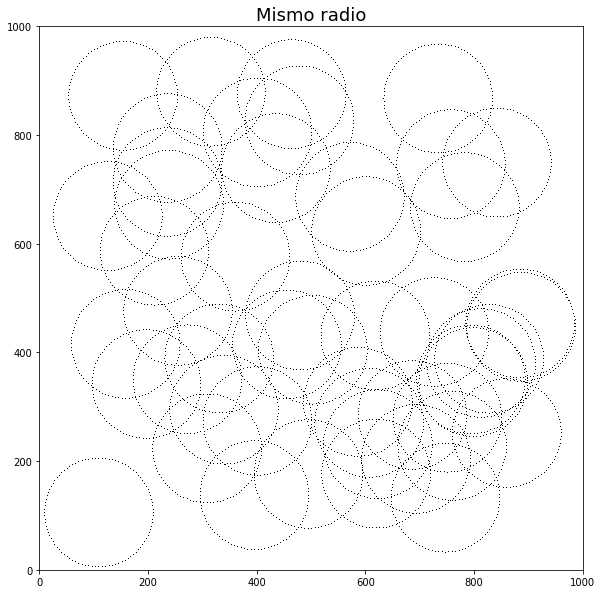

In [41]:
box_size = 1000
X, Y = unif_circles_dist(box_size, 50, 100, 100.0)
plt.plot(X, Y, 'k,')
plt.gca().set_aspect('equal')
plt.xlim([0, box_size])
plt.ylim([0, box_size])
plt.title("Mismo radio", fontsize = 18)

### 2. Haz un algoritmo que calcule la función de correlación con $\frac{DD}{RR} - 1$ con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de *bin*, y observa qué ocurre.

In [42]:
def create_rand_dist(box_size, n_points):
    X = []
    Y = []
    
    for i in range(n_points):
        X.append(box_size * random.random())
        Y.append(box_size * random.random())
        
    return X, Y

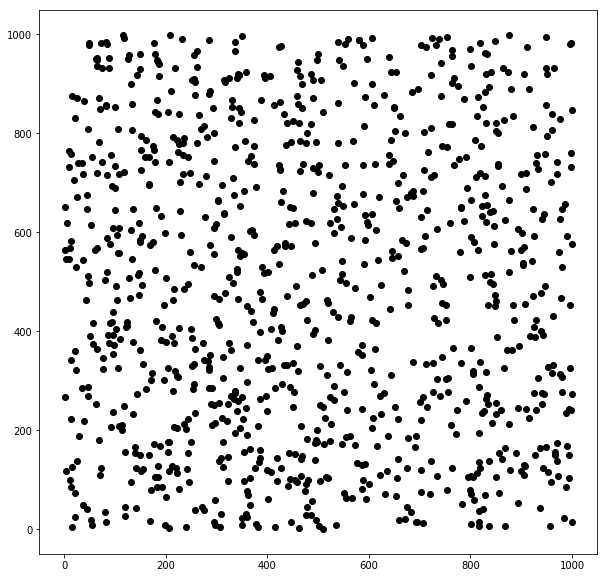

In [43]:
# Veamos qué tan aleatorio luce
x_rand, y_rand = create_rand_dist(1000.0, 1000)
plt.plot(x_rand, y_rand, 'ko')

In [ ]:
# Función que genere el histograma RR

In [ ]:
# Función que genere el histograma DD

In [ ]:
# Función que haga la correlación